In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re

#goodf = pd.read_csv("googleplaystoreme12.csv", encoding="mac_latin2")
goodf = pd.read_csv("Oesterle_006118805.csv", encoding="mac_latin2")
#".../......csv" <-format

#remove columns that are not needed
del goodf['Content Rating']
del goodf['Current Ver']
del goodf['Genres']
del goodf['Android Ver']
del goodf['Last Updated']


goodf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
2,"U Launcher Lite ‚Äď FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


In [21]:
#remove unwanted symbols
goodf.Installs = [x.strip().replace('+', '') for x in goodf.Installs]
goodf.Installs = [x.strip().replace(',', '') for x in goodf.Installs]
goodf.Size = [y.strip().replace('M', '') for y in goodf.Size]
goodf.Price = [w.strip().replace('$', '') for w in goodf.Price]

#convert to numeric
goodf.Installs = pd.to_numeric(goodf.Installs, errors='coerce')
goodf.Size = pd.to_numeric(goodf.Size, errors='coerce')
goodf.Price = pd.to_numeric(goodf.Price, errors='coerce')
goodf.Reviews = pd.to_numeric(goodf.Reviews, errors='coerce')

goodf.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0
2,"U Launcher Lite ‚Äď FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0


In [22]:
#sort by Installs
goodf.sort_values("Installs", axis = 0, ascending = True, inplace = True, na_position ='first') 

#drop NA
goodf = goodf.dropna()
goodf.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1.0,Paid,0.99
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.0,1.0,Free,0.00
5917,Ra Ga Ba,GAME,5.0,2.0,20.0,1.0,Paid,1.49
7147,CB Heroes,SOCIAL,5.0,5.0,1.8,5.0,Free,0.00
2484,Clinic Doctor EHr,MEDICAL,5.0,2.0,7.1,5.0,Free,0.00


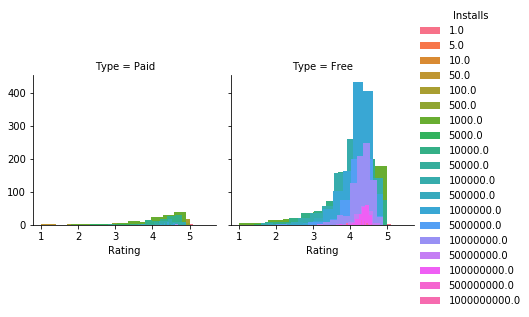

In [23]:
#comparing how many installs per rating
g = sns.FacetGrid(goodf, col="Type",hue="Installs")
g.map(plt.hist, "Rating");
g.add_legend();


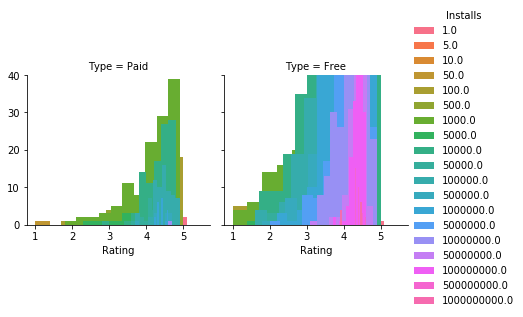

In [24]:
#a closer look for paid #comparing how many installs per rating
g = sns.FacetGrid(goodf, col="Type",hue="Installs")
g.map(plt.hist, "Rating");
g.add_legend();
g = g.set(ylim=(0, 40))


In [25]:
#correlation between customer rating and number of Installs

goodf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1.0,Paid,0.99
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.0,1.0,Free,0.00
5917,Ra Ga Ba,GAME,5.0,2.0,20.0,1.0,Paid,1.49
7147,CB Heroes,SOCIAL,5.0,5.0,1.8,5.0,Free,0.00
2484,Clinic Doctor EHr,MEDICAL,5.0,2.0,7.1,5.0,Free,0.00


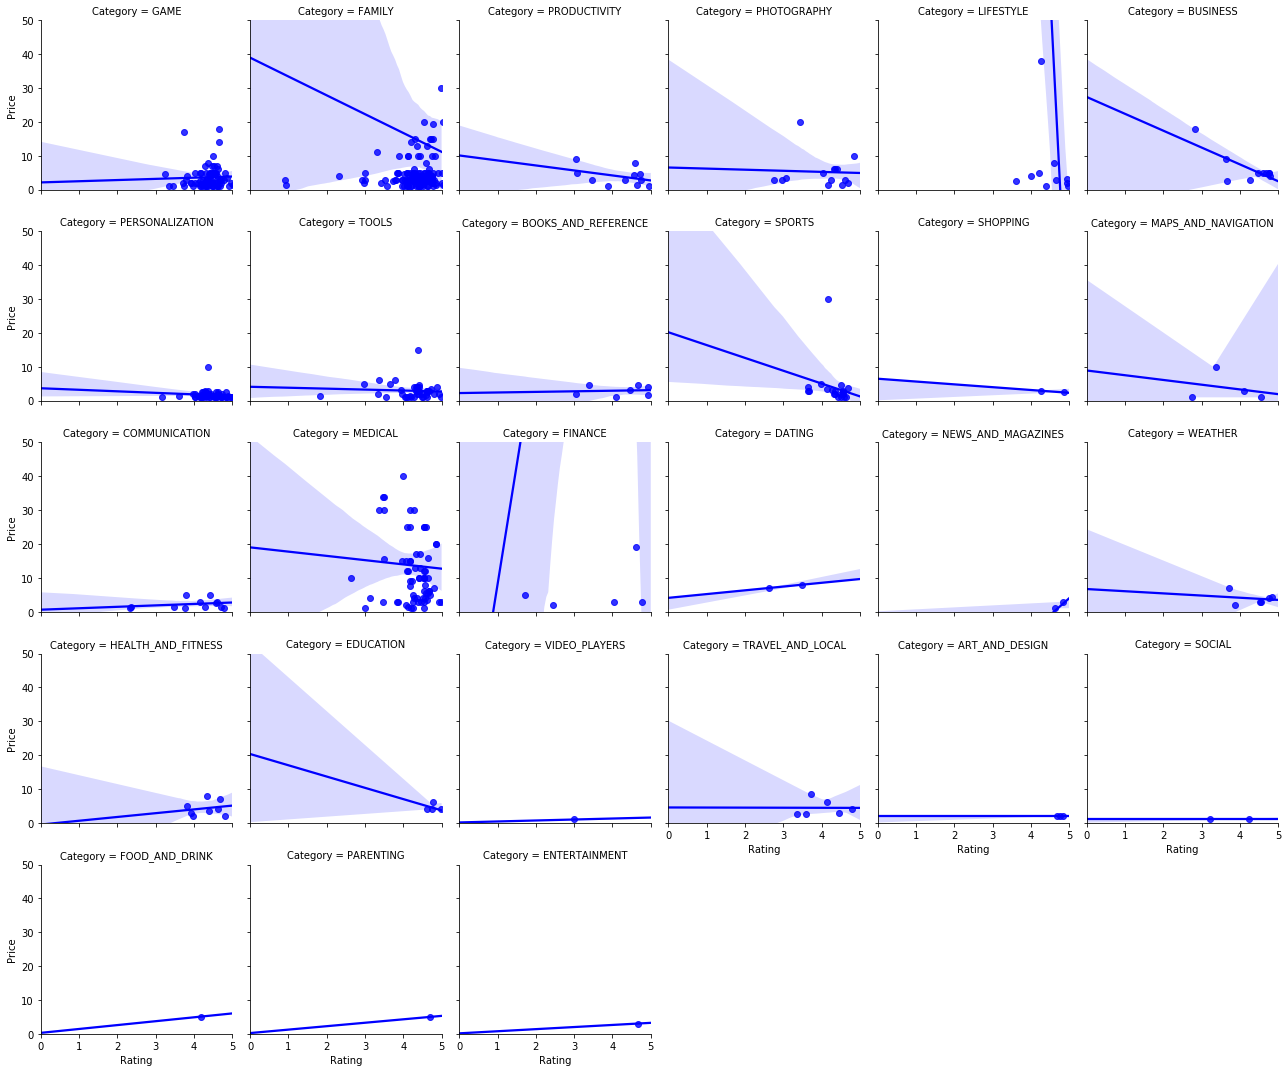

In [26]:


#correlation between higher price and lower ratings for each category
newdf= goodf.loc[goodf['Type'] == 'Paid']#only need paid apps for this

g = sns.FacetGrid(newdf, col="Category",col_wrap=6)
g = g.set(ylim=(0,50))
g = g.set(xlim=(0, 5))
g.map(sns.regplot, "Rating", "Price", color="blue",fit_reg=True, x_jitter=.1);

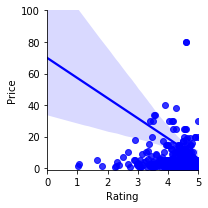

In [27]:
#overall correlation between higher price and lower ratings
g = sns.FacetGrid(newdf)
g = g.set(ylim=(-1, 100))
g = g.set(xlim=(0, 5))
g.map(sns.regplot, "Rating", "Price", color="blue",fit_reg=True, x_jitter=.1);

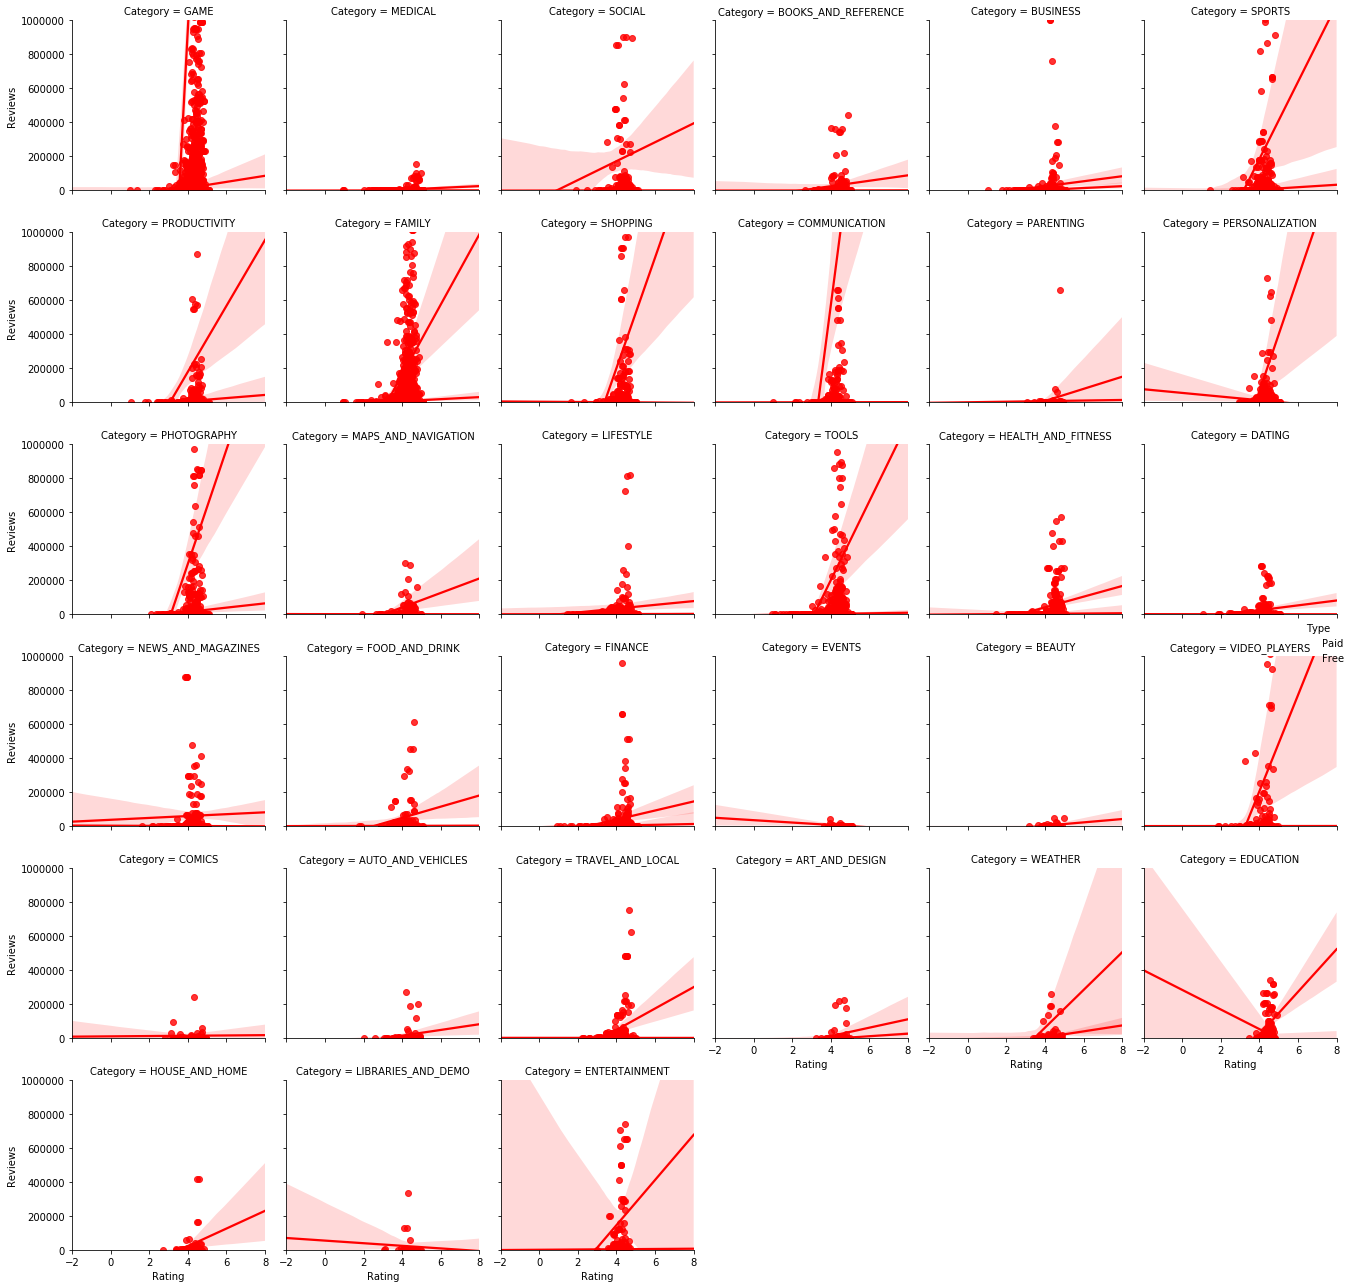

In [28]:
#correlation between higher review count and higher rating

g = sns.FacetGrid(goodf, col="Category",hue="Type", col_wrap=6)
g = g.set(ylim=(0, 1000000))
g = g.set(xlim=(-2, 8))
g.add_legend();
g.map(sns.regplot, "Rating", "Reviews", color="red",fit_reg=True, x_jitter=.1);

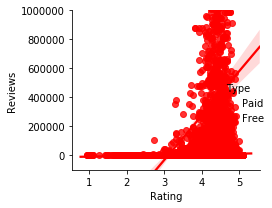

In [29]:
#overall correlation between higher review count and higher rating
g = sns.FacetGrid(goodf,hue="Type")
g = g.set(ylim=(-100000, 1000000))
g.add_legend();
g.map(sns.regplot, "Rating", "Reviews", color="red",fit_reg=True, x_jitter=.1);



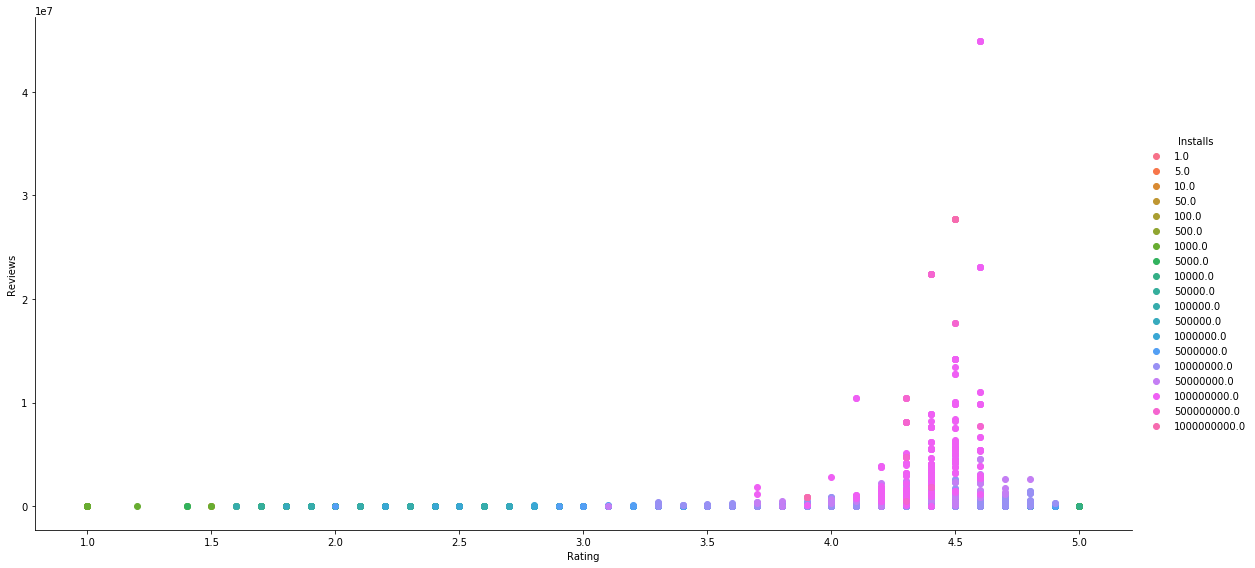

In [30]:
#more reviews and installs should cause a higher rating #large scale
g = sns.FacetGrid(goodf, hue="Installs", height=8, aspect=2)
g.map(plt.scatter,"Rating" ,"Reviews");
g.add_legend();



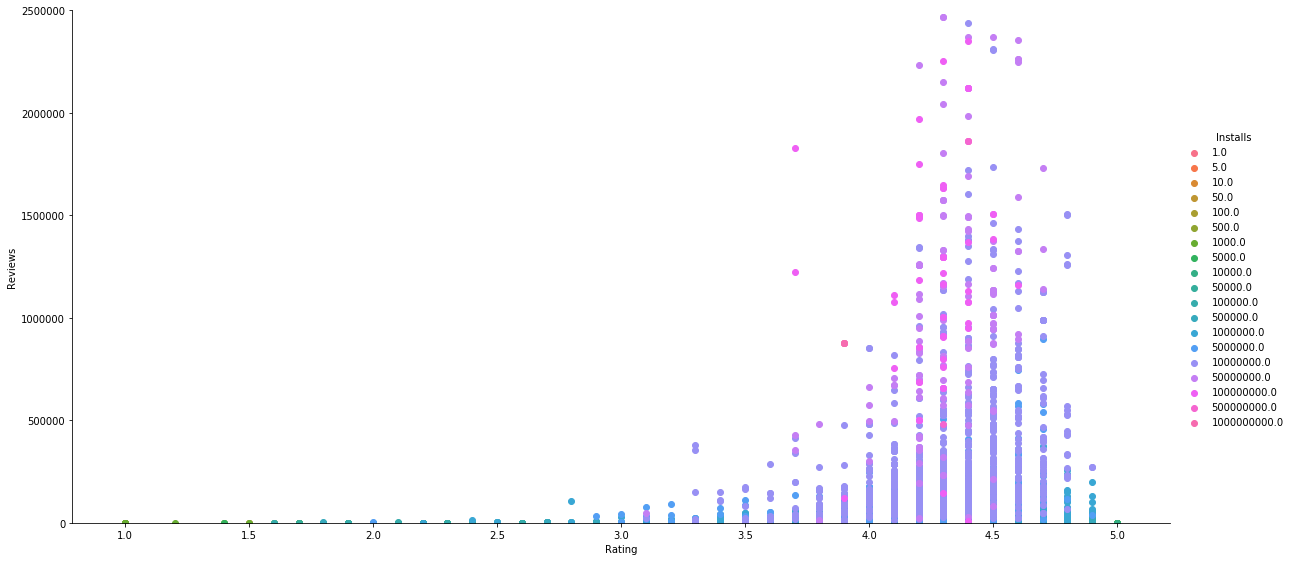

In [31]:
#more reviews and installs should cause a higher rating #medium scale #ideal
g = sns.FacetGrid(goodf, hue="Installs", height=8, aspect=2)
g.map(plt.scatter,"Rating" ,"Reviews");
g = g.set(ylim=(0, 2500000))
g.add_legend();

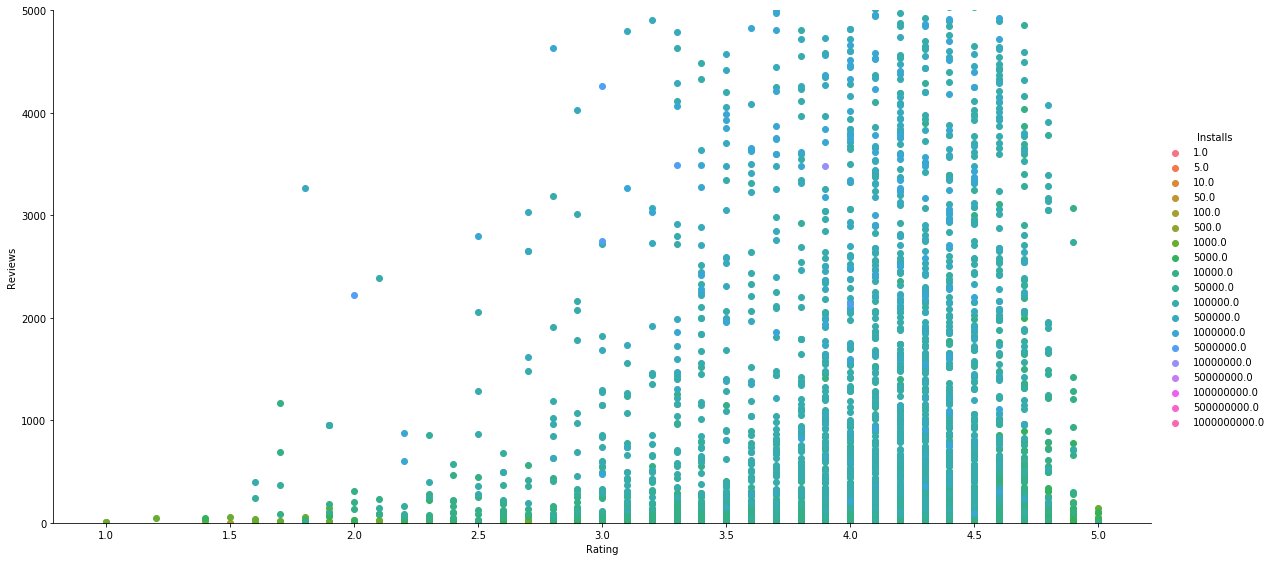

In [32]:
#more reviews and installs should cause a higher rating #smallest scale to have a closer look
g = sns.FacetGrid(goodf, hue="Installs", height=8, aspect=2)
g.map(plt.scatter,"Rating" ,"Reviews");
g = g.set(ylim=(0, 5000))
g.add_legend();